In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
data_dir = r"C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data" 
data = tf.keras.utils.image_dataset_from_directory(data_dir,seed=123,image_size=(180,180), batch_size=16)
print(data.class_names)

class_names = data.class_names

Found 300 files belonging to 3 classes.
['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']


In [4]:
img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size = (img_size,img_size),
    batch_size = batch,
)

Found 300 files belonging to 3 classes.


In [5]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)

Total Images: 10
Train Images: 9
Validation Images: 1


In [6]:
from PIL import Image
import os

def convert_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Pastikan format yang valid
                try:
                    image_path = os.path.join(root, file)
                    with Image.open(image_path) as img:
                        new_image_path = image_path.replace(file, file.split('.')[0] + '.jpg')
                        img.convert('RGB').save(new_image_path, 'JPEG')  # Mengonversi gambar ke JPEG
                        print(f"Converted: {image_path} -> {new_image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

base_dir = r'C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data'
convert_images(base_dir)

Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA1.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA1.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA10.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA10.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA100.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA100.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA11.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA11.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA12.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA12.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA13.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\tr

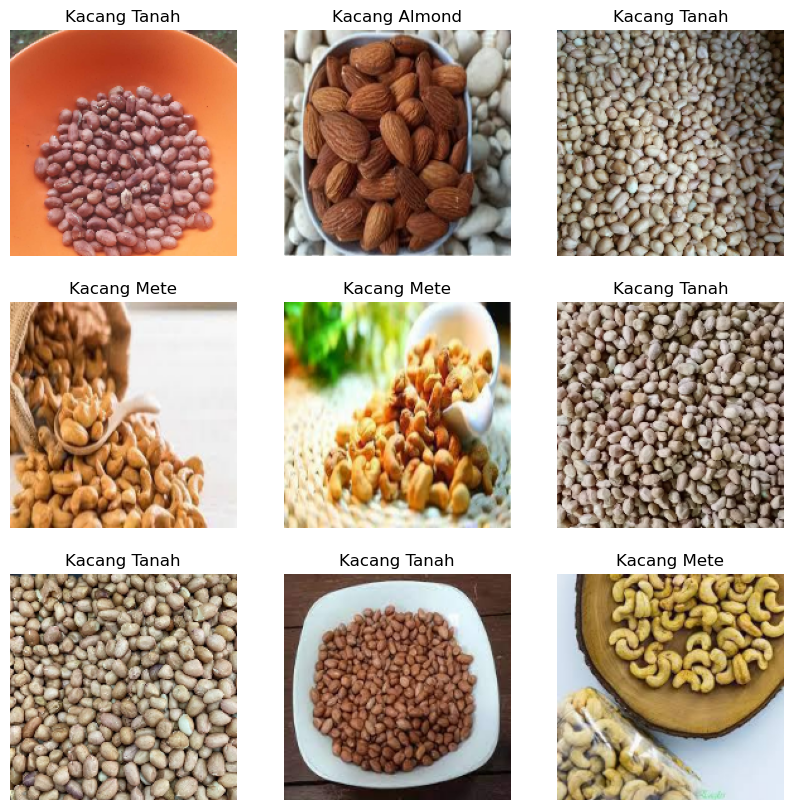

In [7]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [8]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


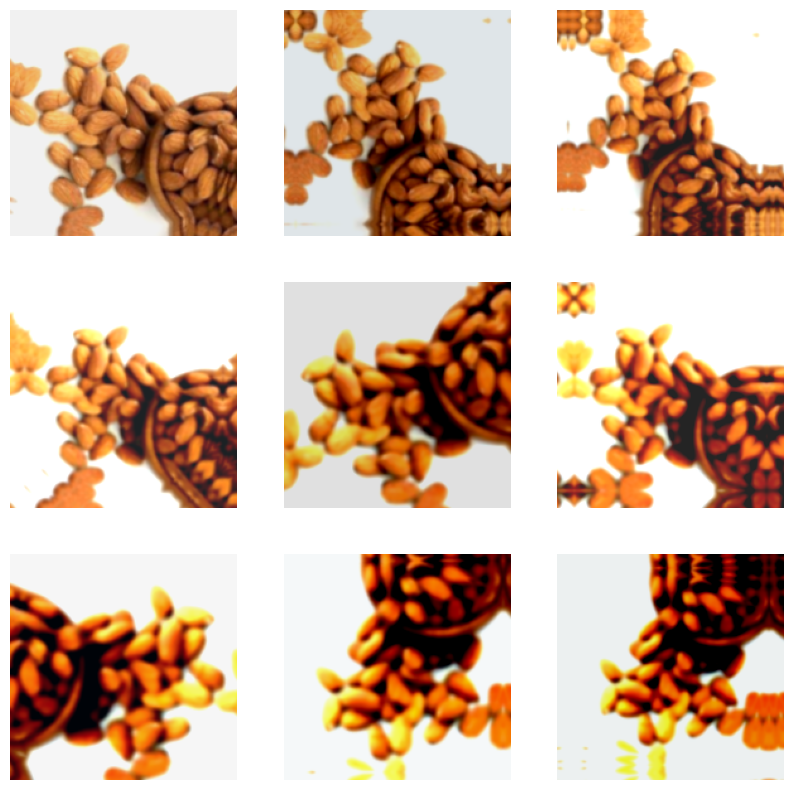

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [10]:
from PIL import Image
import os

def convert_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Pastikan format yang valid
                try:
                    image_path = os.path.join(root, file)
                    with Image.open(image_path) as img:
                        new_image_path = image_path.replace(file, file.split('.')[0] + '.jpg')
                        img.convert('RGB').save(new_image_path, 'JPEG')  # Mengonversi gambar ke JPEG
                        print(f"Converted: {image_path} -> {new_image_path}")
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")

base_dir = r'C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data'
convert_images(base_dir)

Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA1.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA1.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA10.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA10.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA100.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA100.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA11.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA11.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA12.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA12.jpg
Converted: C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\train_data\Kacang Almond\KA13.jpg -> C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\tr

In [11]:
import tensorflow as tf
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
import keras._tf_keras.keras.backend as K

# Membuat model VGG-16 dari awal
def vgg16(input_shape, n_classes):
    input = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D((2, 2), strides=2)(x)

    # Block 2
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D((2, 2), strides=2)(x)

    # Block 3
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D((2, 2), strides=2)(x)

    # Block 4
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D((2, 2), strides=2)(x)

    # Block 5
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = MaxPool2D((2, 2), strides=2)(x)

    # Fully connected layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output layer
    output = Dense(n_classes, activation='softmax')(x)

    # Membuat model
    model = Model(inputs=input, outputs=output)
    return model

# Pastikan input shape dan jumlah kelas sesuai
input_shape = (180, 180, 3)  # Resolusi gambar
n_classes = 3  # Contoh: kacang tanah, kacang mete, kacang almond

# Clear cache Keras menggunakan clear session
K.clear_session()

# Membuat model VGG-16
model = vgg16(input_shape, n_classes)

# Menampilkan summary dari model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    52,432,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,29

 Total params: 83,941,187 (320.21 MB)

 Trainable params: 83,941,187 (320.21 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Model VGG-16 dengan Sequential
model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(180, 180, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    # Block 2
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    # Block 3
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    # Block 4
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    # Block 5
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(3, activation='softmax')  # Jumlah kelas: 3
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Buat EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

# Fit model
history = model.fit(
    train_ds, 
    epochs=30, 
    validation_data=val_ds, 
    callbacks=[early_stopping]
)


c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.3695 - loss: 1.2266 - val_accuracy: 0.1667 - val_loss: 1.1342
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.3442 - loss: 1.0957 - val_accuracy: 0.3333 - val_loss: 1.0365
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.3968 - loss: 1.0466 - val_accuracy: 0.4167 - val_loss: 1.0272
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.5657 - loss: 0.8610 - val_accuracy: 0.5000 - val_loss: 1.3523
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.6060 - loss: 0.7995 - val_accuracy: 0.5000 - val_loss: 0.9711
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step - accuracy: 0.6237 - loss: 0.7718 - val_accuracy: 0.5833 - val_loss: 1.0156
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 6s/step - accuracy: 0.6508 - loss: 0.7727 - val_accuracy: 0.4167 - val_loss: 0.8240
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.7047 - loss: 0.7282 - val_accuracy: 0.6667 - val_loss: 0.7695
Epoch 9/

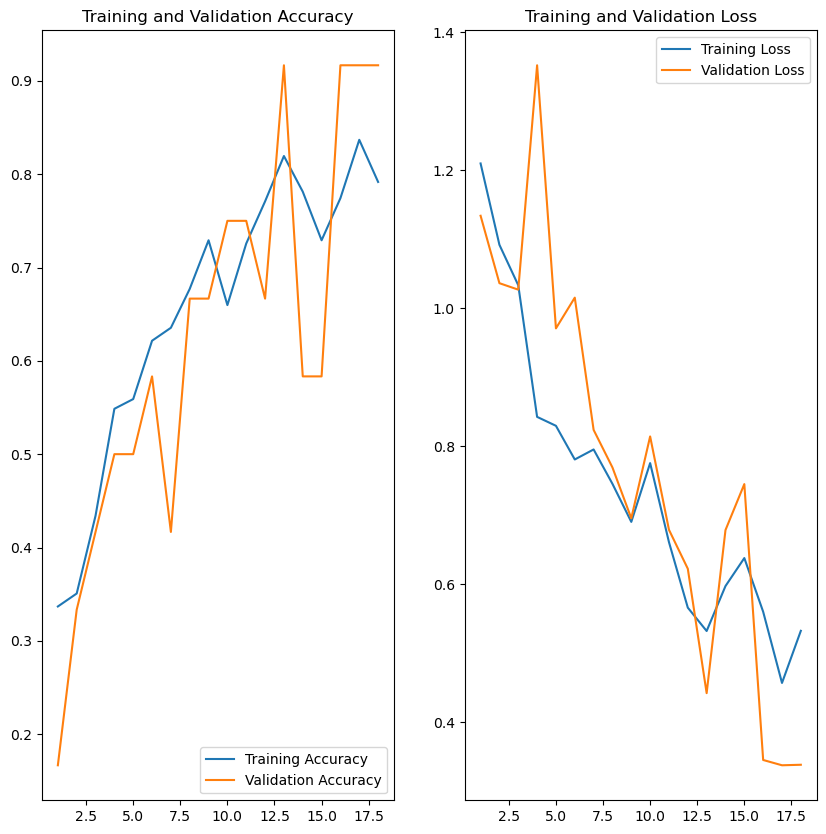

In [13]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('BestModel_VGG-16_Numpy.h5')

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'BestModel_VGG-16_Numpy.h5')  # Ganti dengan path model Anda
class_names = ['Kacang Almond', 'Kacang Mete', 'Kacang Tanah']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
result = classify_images(r'C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\test_data\Validation Kacang Almond\KA3.jpg', save_path='KA3.jpg')
print(result)


Terjadi kesalahan: [Errno 2] No such file or directory: 'C:\\Users\\PC\\Downloads\\Googlenet_A_Numpy_RAFI\\test_data\\Validation Kacang Almond\\KA3.jpg'


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


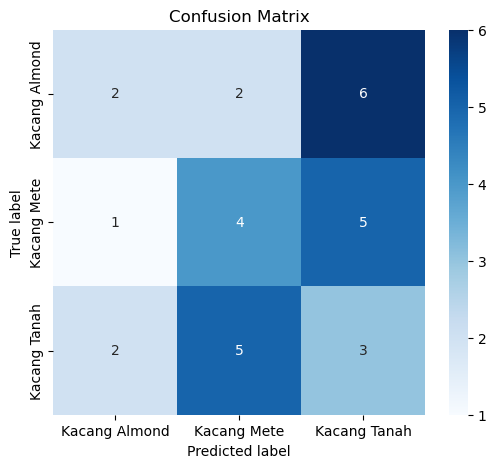

Confusion Matrix:
 [[2 2 6]
 [1 4 5]
 [2 5 3]]
Akurasi: 0.3
Presisi: [0.4        0.36363636 0.21428571]
Recall: [0.2 0.4 0.3]
F1 Score: [0.26666667 0.38095238 0.25      ]


In [16]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\PC\Downloads\Googlenet_A_Numpy_RAFI\test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(180, 180)
)

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"], yticklabels=["Kacang Almond", "Kacang Mete", "Kacang Tanah"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())